# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
data = pd.read_csv('previsao_de_renda.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [15]:
dados_qualitativos = data[['posse_de_veiculo', 'posse_de_imovel']]
dados_qualitativos.head()

,posse_de_veiculo,posse_de_imovel
0,False,True
1,True,True
2,True,True
3,True,False
4,False,False


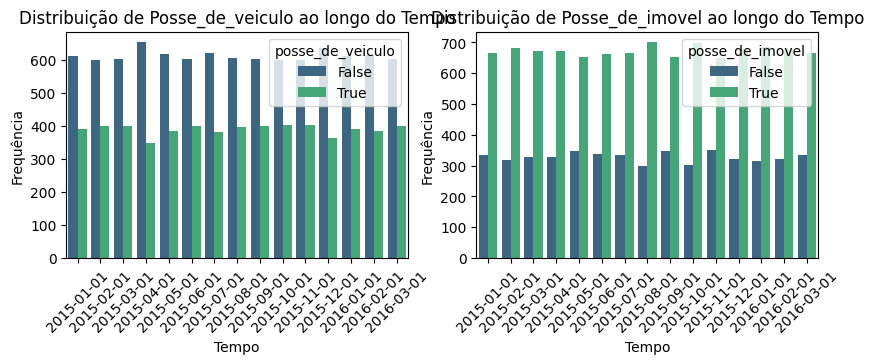

In [17]:
#Ajustar a referencia de tempo
data['data_ref'] = pd.to_datetime(data['data_ref'])

# Configurar tamanho do gráfico
plt.figure(figsize=(15, 10))

# Loop para criar gráficos de barras
for i, var in enumerate(dados_qualitativos):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        x='data_ref', hue=var, data=data,
        order=data['data_ref'].sort_values().unique(),
        palette='viridis'
    )
    plt.title(f"Distribuição de {var.capitalize()} ao longo do Tempo")
    plt.xticks(rotation=45)
    plt.ylabel("Frequência")
    plt.xlabel("Tempo")

In [ ]:
# percebe-se que no mês três  de 2015 existe um aumento da diferença entre quem possui veículo e quem não possui. O mesmo fato ocorre no mês sete de 2015 com a posse de imóveis.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

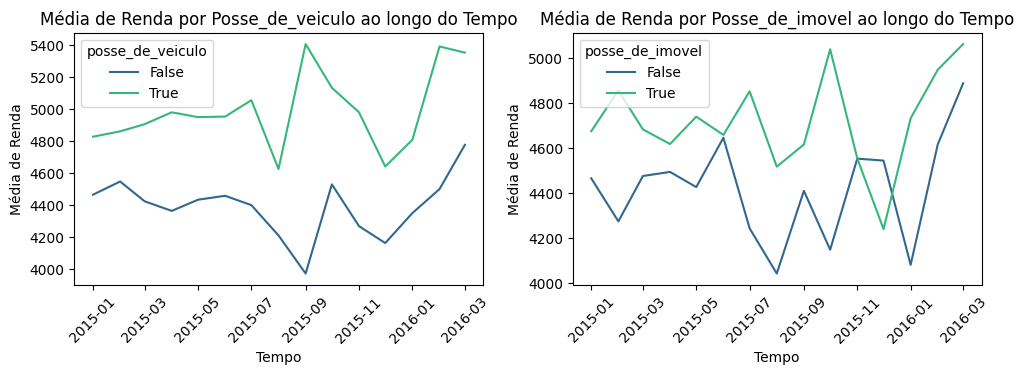

In [16]:
# Configurar tamanho do gráfico
plt.figure(figsize=(15, 10))

# Loop para criar gráficos para cada variável
for i, var in enumerate(dados_qualitativos):
    # Calcular as médias por nível da variável e por data_ref
    medias = data.groupby(['data_ref', var])['renda'].mean().reset_index()

    plt.subplot(3, 3, i + 1)
    sns.lineplot(
        x='data_ref', y='renda', hue=var, data=medias, palette='viridis'
    )
    plt.title(f"Média de Renda por {var.capitalize()} ao longo do Tempo")
    plt.xticks(rotation=45)
    plt.ylabel("Média de Renda")
    plt.xlabel("Tempo")

plt.tight_layout()
plt.show()

In [ ]:
#Não há uma diferença muito marcante na distribuição por posse de veículos, porém as flutuações são maiores em posse de imóvel, isso pode nos ajudar a fazer campanhas mais direcionadas nessas epocas para determinado público se esse comportamento se mostrar consistente em outros anos.